In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
train = pd.read_csv("C:/Users/GOWTHAM/Downloads/Train.csv")
test = pd.read_csv("C:/Users/GOWTHAM/Downloads/Test.csv")

In [3]:
train_new = train.copy()
test_new = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.shape


(614, 13)

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
test.shape

(367, 12)

<Axes: >

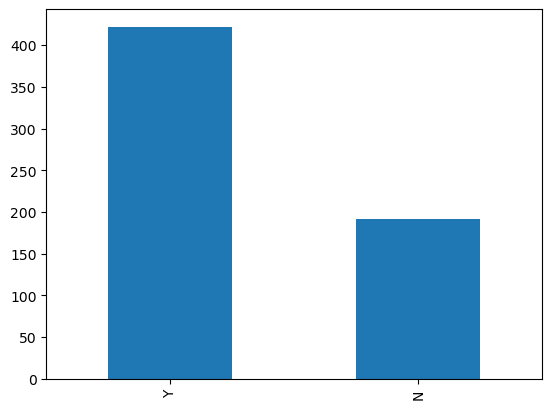

In [8]:
train['Loan_Status'].value_counts().plot.bar()

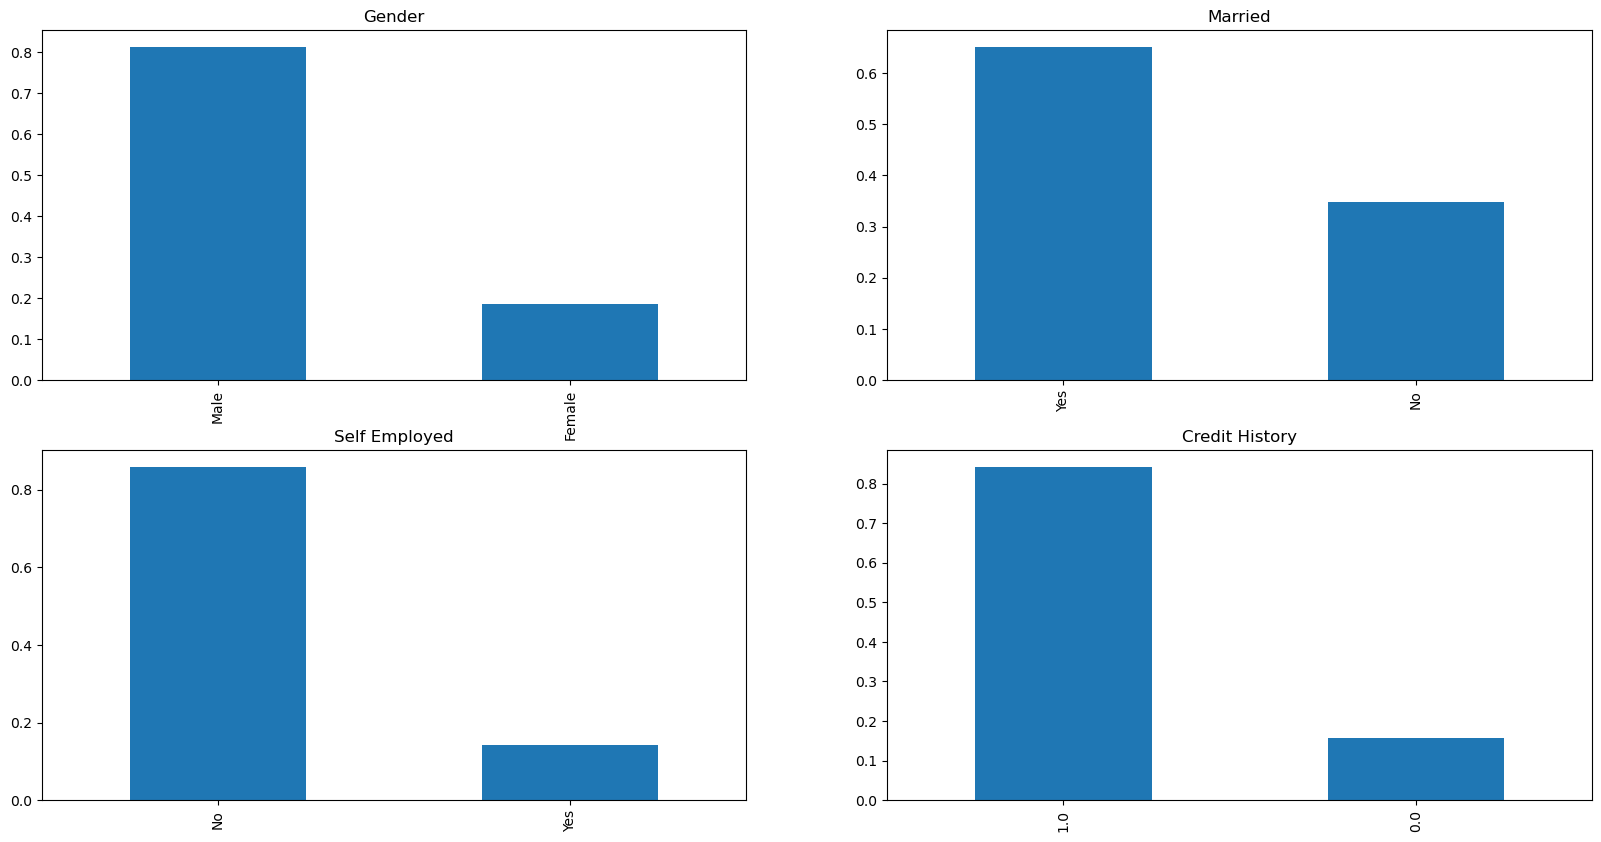

In [9]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.show()


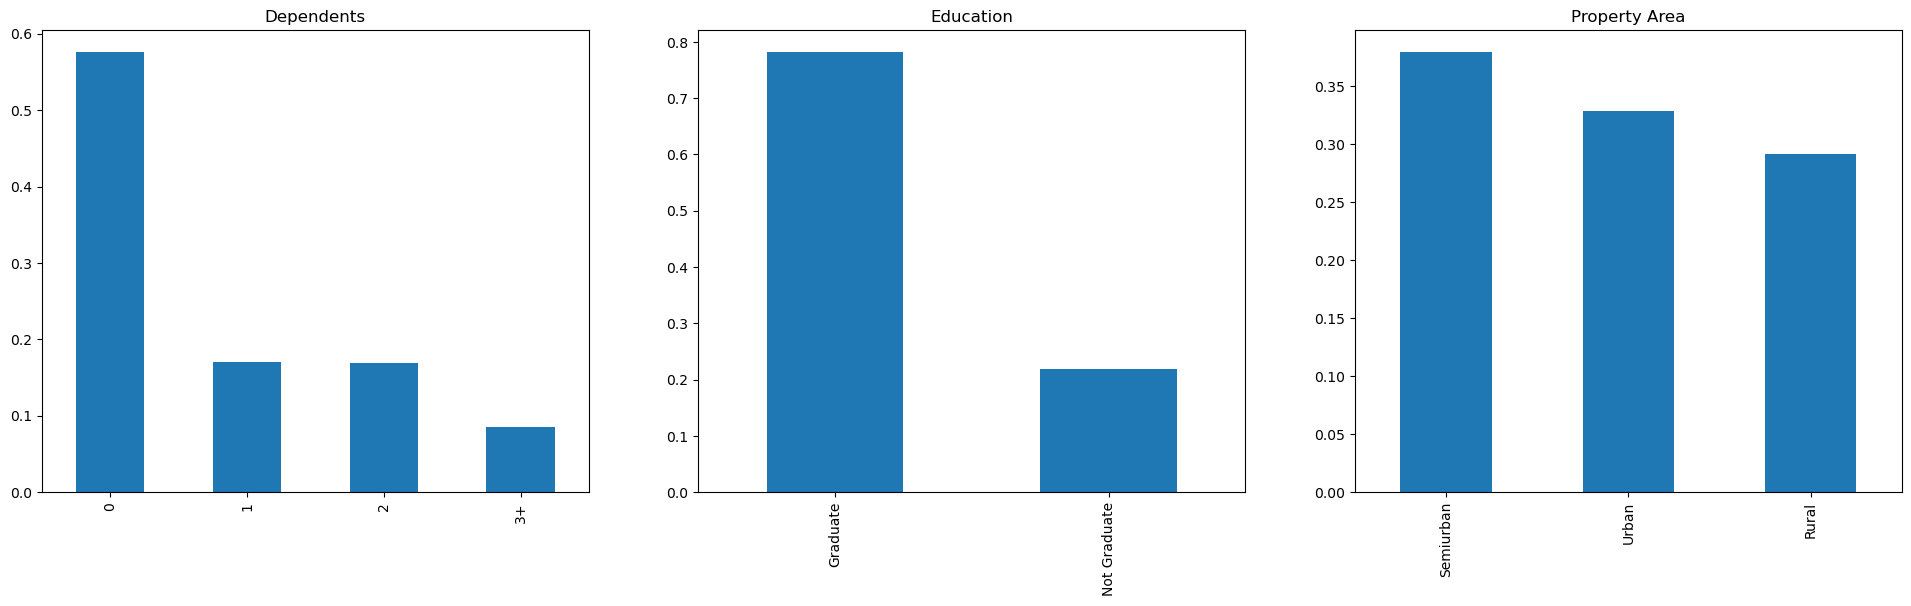

In [10]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property Area')
plt.show()

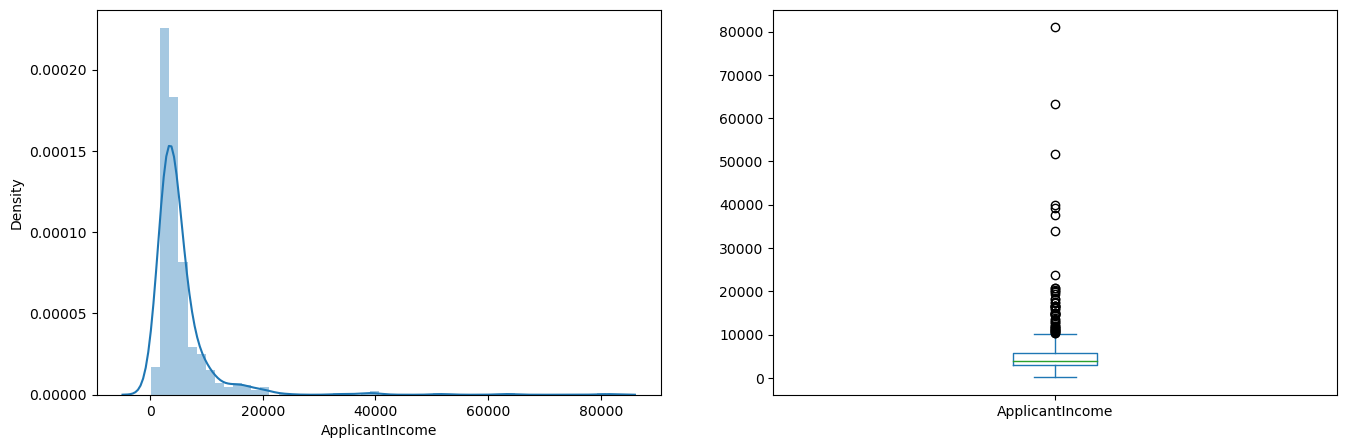

In [11]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

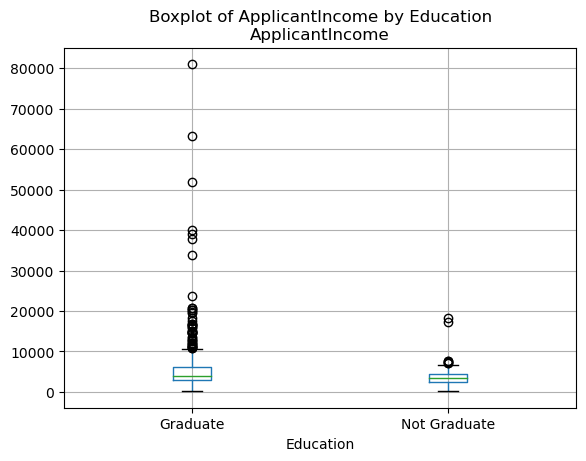

In [12]:
train.boxplot(column = 'ApplicantIncome', by = 'Education') 
plt.suptitle("Boxplot of ApplicantIncome by Education")
plt.show()

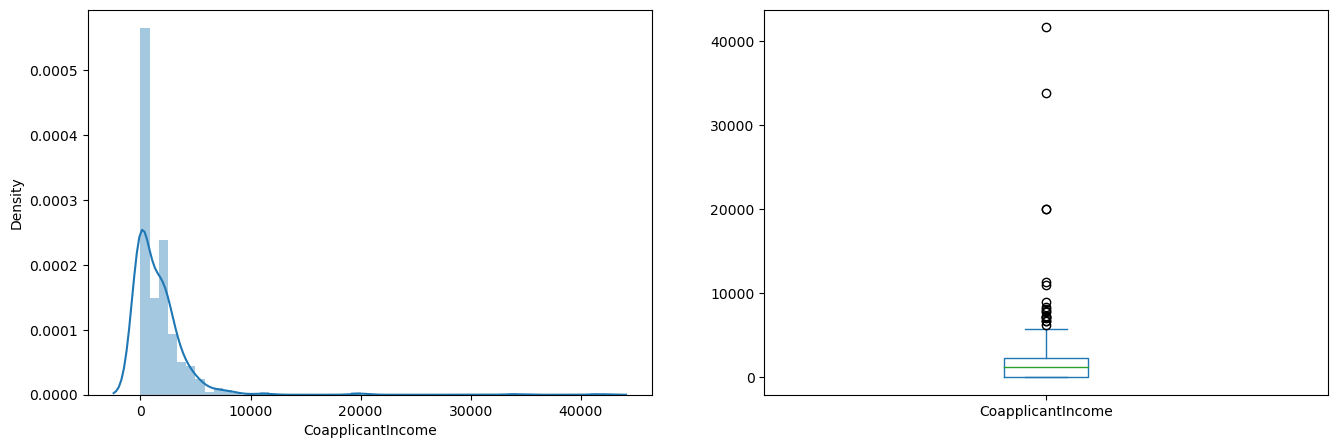

In [13]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

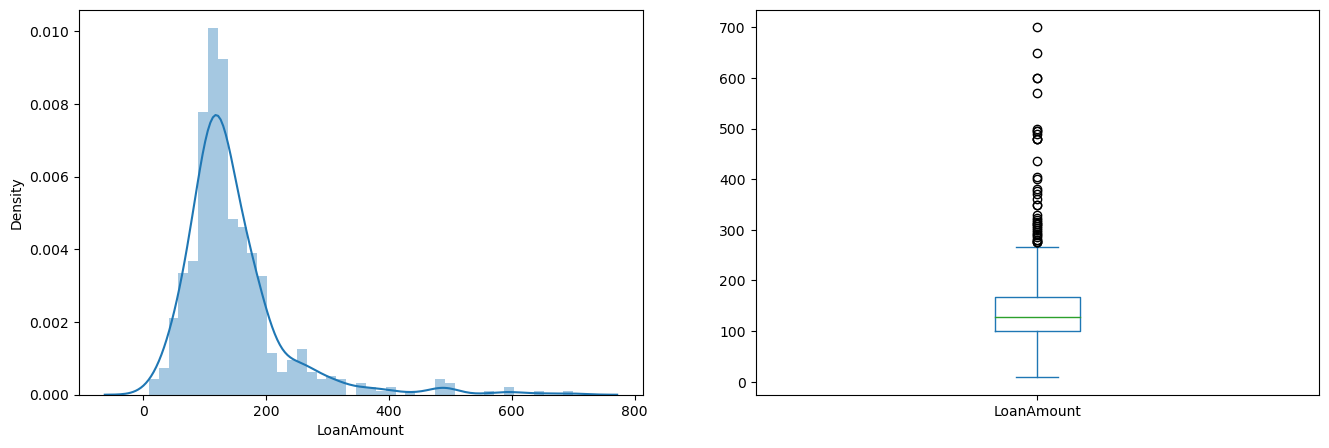

In [14]:
plt.figure(1)
plt.subplot(121) 
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<Axes: xlabel='Gender'>

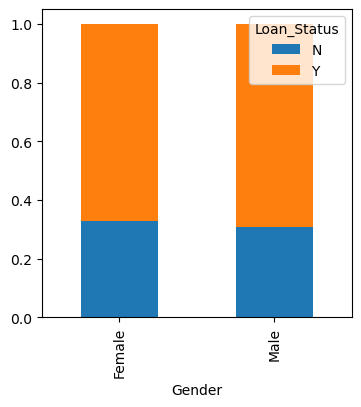

In [15]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize =(4,4))


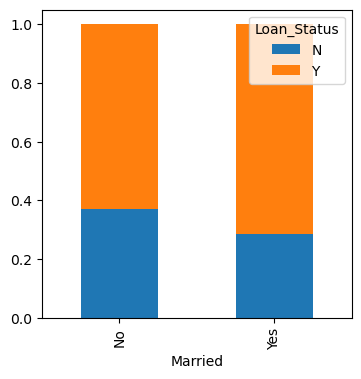

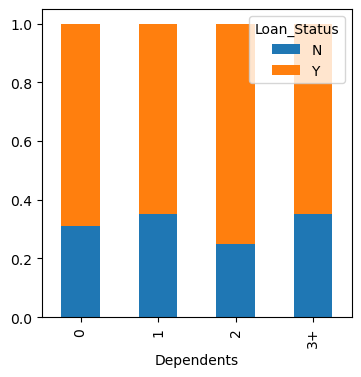

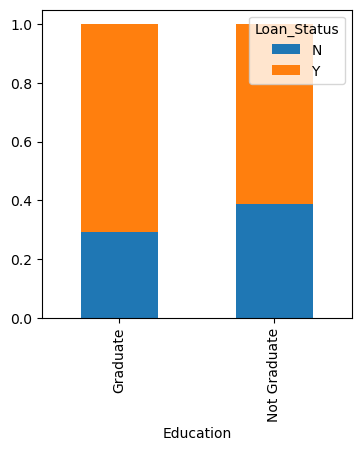

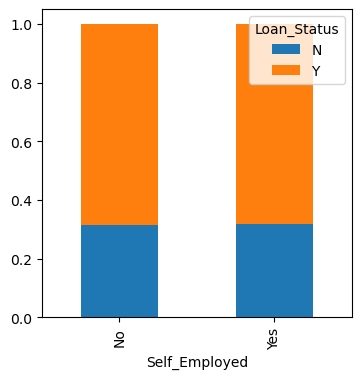

In [16]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked= True, figsize = (4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1),axis=0).plot(kind="bar",stacked=True, figsize = (4,4))
plt.show()


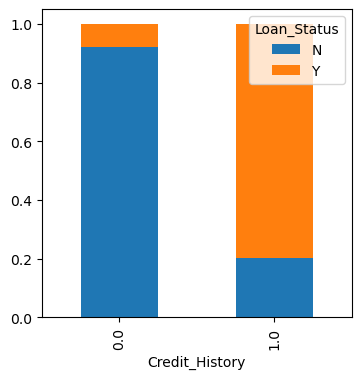

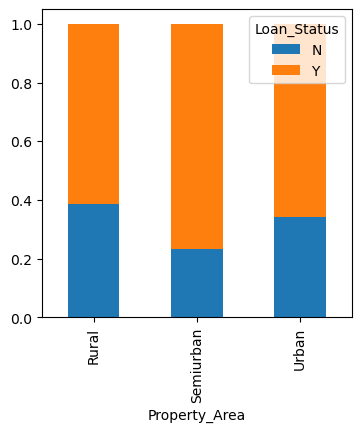

In [17]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar", stacked = True, figsize = (4,4))
plt.show()


<Axes: xlabel='Loan_Status'>

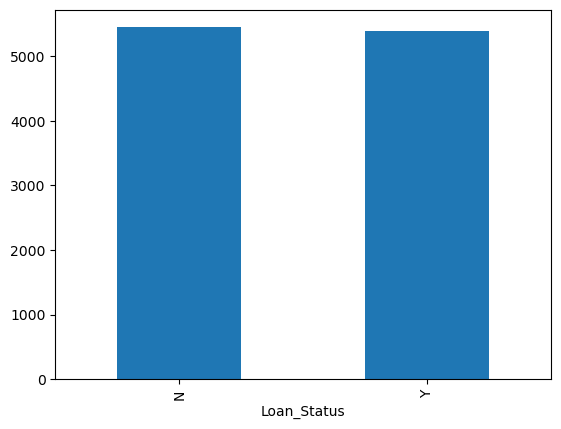

In [18]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

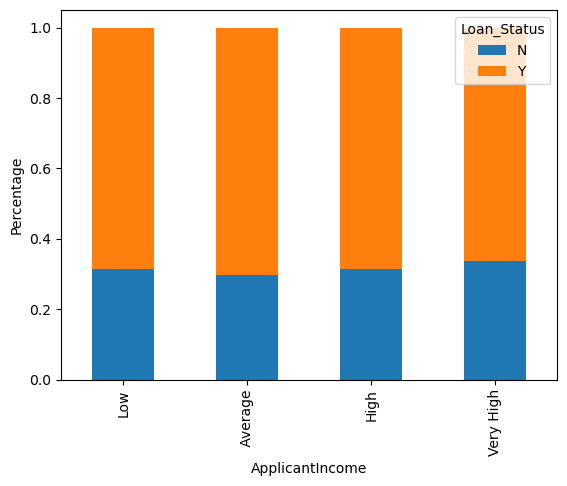

In [19]:
bins = [0,2500, 4000, 6000, 81000] 
group = ["Low", " Average", "High", "Very High"]
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins, labels = group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind = "bar", stacked = True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

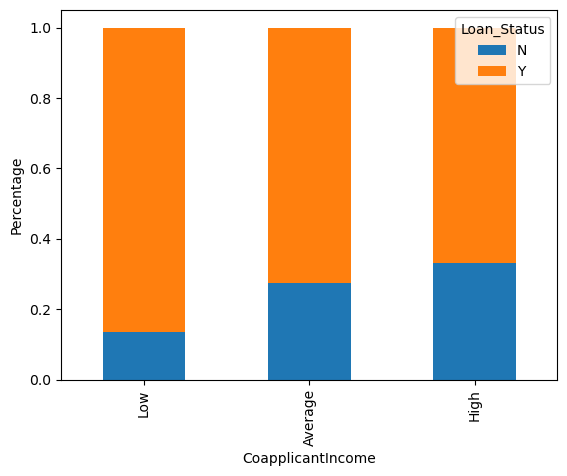

In [20]:
bins = [0,1000,3000,42000] 
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins , labels = group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1). astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

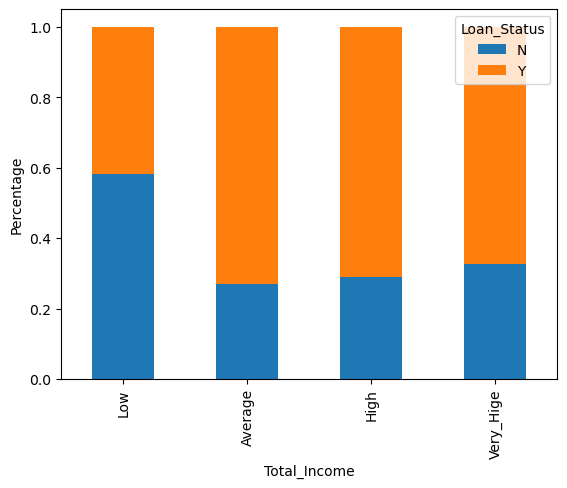

In [21]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [ 0,2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very_Hige']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels = group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind="bar",stacked = True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

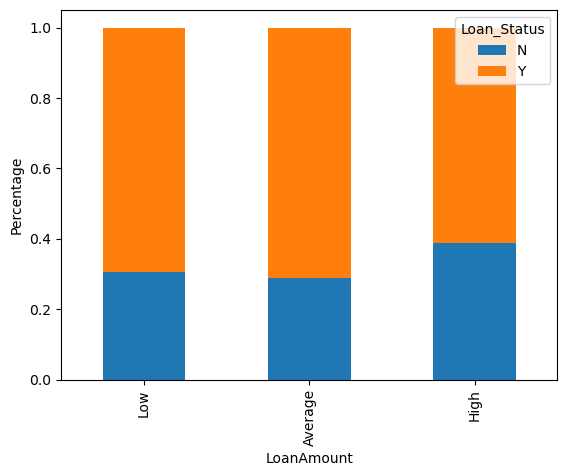

In [22]:
bins = [0,100,200,700] 
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked = True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [23]:
train['Dependents'].replace('3+',3,inplace = True)
test['Dependents'].replace('3+', 3, inplace =True)
train['Loan_Status'].replace('N', 0,inplace = True)
train['Loan_Status'].replace('Y',1, inplace = True)

In [24]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']


bins = [0,2500, 4000, 6000, 81000] 
group = ["Low", " Average", "High", "Very High"]
test['Income_bin'] = pd.cut(test['ApplicantIncome'],bins, labels = group)

bins = [0,1000,3000,42000] 
group = ['Low', 'Average', 'High']
test['Coapplicant_Income_bin'] = pd.cut(test['CoapplicantIncome'], bins , labels = group)

bins = [ 0,2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very_Hige']
test['Total_Income_bin'] = pd.cut(test['Total_Income'], bins, labels = group)

bins = [0,100,200,700] 
group = ['Low','Average','High']
test['LoanAmount_bin'] = pd.cut(test['LoanAmount'],bins,labels=group)




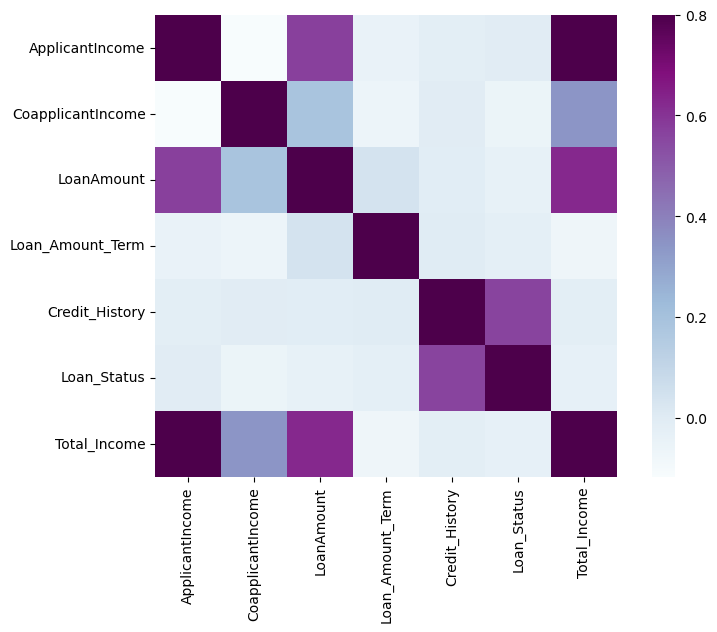

In [25]:
matrix = train.corr()  
ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = "BuPu");

In [26]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Coapplicant_Income_bin'].fillna(train['Coapplicant_Income_bin'].mode()[0],inplace = True)
train['LoanAmount_bin'].fillna(train['LoanAmount_bin'].mode(),inplace = True)

In [28]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [30]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)

In [31]:
train.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
Income_bin                 0
Coapplicant_Income_bin     0
Total_Income               0
Total_Income_bin           0
LoanAmount_bin            21
dtype: int64

In [32]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
test['Married'].fillna(train['Married'].mode()[0], inplace= True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)


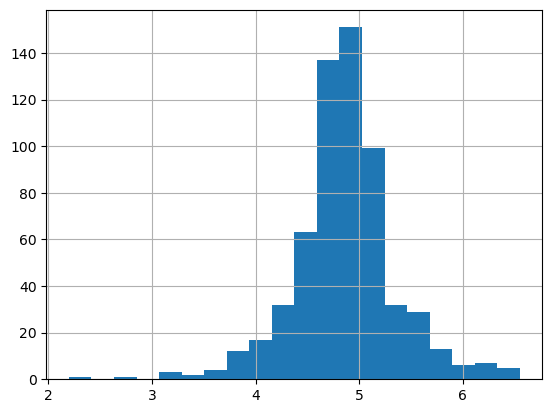

In [33]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [34]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [35]:
X = train.drop('Loan_Status' , 1)
y = train.Loan_Status

In [36]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept= True, intercept_scaling = 1, max_iter = 100, multi_class = 'ovr', n_jobs =1, penalty = '12', random_state=1, solver = 'liblinear', tol = 0.0001, verbose = 0, warm_start = False)


LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [39]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.8216216216216217

In [40]:
pred_test = model.predict(test)

In [41]:
print(list(x_train.columns))
print(list(x_cv.columns))



['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'LoanAmount_log', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Income_bin_Low', 'Income_bin_ Average', 'Income_bin_High', 'Income_bin_Very High', 'Coapplicant_Income_bin_Low', 'Coapplicant_Income_bin_Average', 'Coapplicant_Income_bin_High', 'Total_Income_bin_Low', 'Total_Income_bin_Average', 'Total_Income_bin_High', 'Total_Income_bin_Very_Hige', 'LoanAmount_bin_Low', 'LoanAmount_bin_Average', 'LoanAmount_bin_High']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'LoanAmount_log', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependen

In [42]:
submission = pd.read_csv("C:/Users/GOWTHAM/Downloads/sample_submission_49d68Cx.csv")

In [43]:
submission['Loan_Status'].replace(0, 'N',inplace =True)
submission['Loan_Status'].replace(1,'Y',inplace = True)


In [44]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [45]:
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5, random_state = 1, shuffle=True)
for train_index, test_index in kf.split(X,y):  
    print('\n{} of kfold {}'.format(i,kf.n_splits))
xtr, xvl = X.iloc[train_index],X.iloc[test_index]
ytr, yvl = y.iloc[train_index],y.iloc[test_index]
model = LogisticRegression(random_state=1)
model.fit(xtr,ytr)
pred_test = model.predict(xvl)
score = accuracy_score(yvl,pred_test)
print('accuracy_score',score)
i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7786885245901639


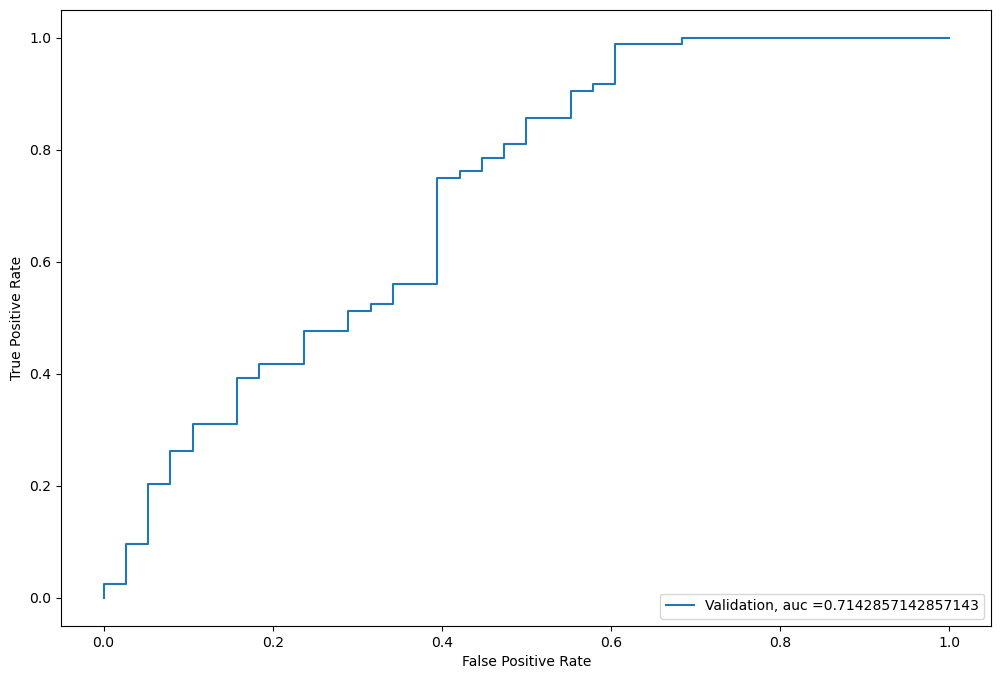

In [46]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl, pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label = "Validation, auc ="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [47]:
submission['Loan_Status'] = pred_test


In [48]:
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace= True)

In [49]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('Logistic.csv')

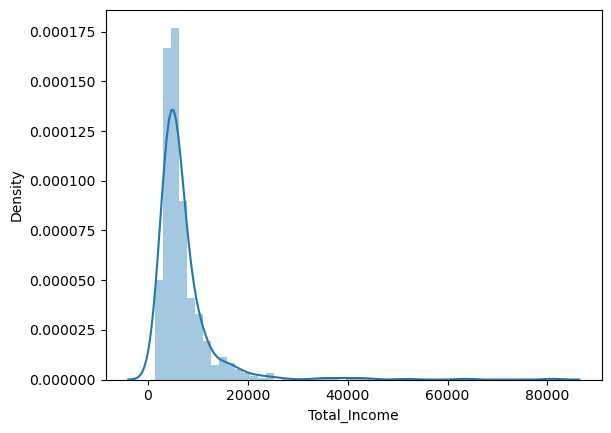

In [50]:
sns.distplot(train['Total_Income']);

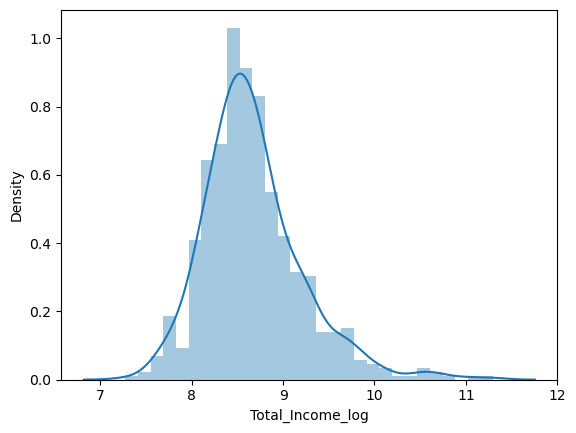

In [51]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

In [52]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

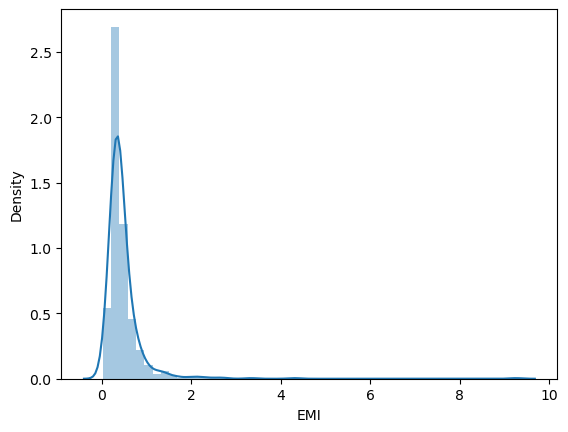

In [53]:
sns.distplot(train['EMI']);

In [54]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000)

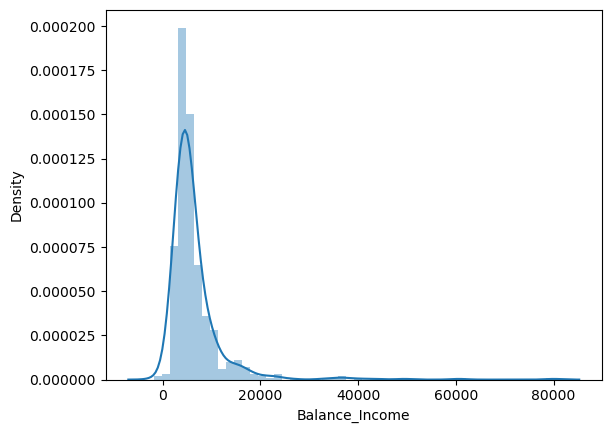

In [55]:
sns.distplot(train['Balance_Income']);

In [56]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [57]:
#Model Building Continuation

#Logistic Regression
#Decision Tree
#Random Forest
#XGBoost

X = train.drop('Loan_Status',1)
y = train.Loan_Status  

In [58]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of Kfold {}'. format(i,kf.n_splits))
xtr, xvl = X.loc[train_index],X.loc[test_index]
ytr, yvl = y[train_index],y[test_index]

model = LogisticRegression(random_state=1)
model.fit(xtr,ytr)
pred_test = model.predict(xvl)
score = accuracy_score(yvl,pred_test)
print('accuracy_score',score)
i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]



1 of Kfold 5

1 of Kfold 5

1 of Kfold 5

1 of Kfold 5

1 of Kfold 5
accuracy_score 0.7868852459016393


In [59]:
## filling loan status with predictions

submission['Loan_Status'] = pred_test 


In [60]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [61]:
pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('Log2.csv')

In [62]:
#Decision Tree

from sklearn import tree

i=1
kf = StratifiedKFold(n_splits=5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of Kfold{}'. format(i,kf.n_splits))
xtr, xvl = X.loc[train_index], X.loc[test_index]
ytr, yvl = y[train_index],y[test_index]
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(xtr,ytr)
pred_test = model.predict(xvl)
score = accuracy_score(yvl,pred_test)
print('accuracy_score', score)
i+=1
pred_test = model.predict(test)


1 of Kfold5

1 of Kfold5

1 of Kfold5

1 of Kfold5

1 of Kfold5
accuracy_score 0.6967213114754098


In [63]:
submission['Loan_Status'] = pred_test


In [64]:
#replace 0 and 1 with N and Y

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [65]:
pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

In [66]:
#Randome Forest

from sklearn.ensemble import RandomForestClassifier

i=1
kf = StratifiedKFold(n_splits=5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of Kfold{}'. format(i,kf.n_splits))
xtr, xvl = X.loc[train_index], X.loc[test_index]
ytr, yvl = y[train_index],y[test_index]
model = RandomForestClassifier(random_state=1, max_depth =10)
model.fit(xtr,ytr)
pred_test = model.predict(xvl)
score = accuracy_score(yvl,pred_test)
print('accuracy_score', score)
i+=1
pred_test = model.predict(test)


1 of Kfold5

1 of Kfold5

1 of Kfold5

1 of Kfold5

1 of Kfold5
accuracy_score 0.7786885245901639


In [82]:
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1,13,2)), 'n_estimators':
            list(range(1,121,20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)



In [83]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y, test_size = 0.3, random_state =1 )



In [91]:
#Fit the grid search model

grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
criterion='gini', max_depth=None, max_features='auto',
max_leaf_nodes=None, min_impurity_decrease = 0.0, min_samples_leaf=1,
min_samples_split =2, min_weight_fraction_leaf=0.0,
n_estimators=10, n_jobs=1, oob_score=False,random_state=1,
verbose=0, warm_start=False),n_jobs=1,
param_grid={'max_depth':[1,3,5,7,9,11],
'n_estimators': [1,21,41,61,81,101]},
pre_dispatch = '2*n_jobs',refit=True, return_train_score='warn',
scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10, n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'n_estimators': [1, 21, 41, 61, 81, 101]},
             return_train_score='warn')

In [96]:
#Estimating the optimized value

grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                      max_depth=3, max_features='auto',
max_leaf_nodes=None, min_impurity_decrease = 0.0, min_samples_leaf=1,
min_samples_split =2, min_weight_fraction_leaf=0.0,
n_estimators=41, n_jobs=1, oob_score=False,random_state=1,
verbose=0, warm_start=False)

RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=41,
                       n_jobs=1, random_state=1)

In [97]:
i=1
kf = StratifiedKFold(n_splits=5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of Kfold{}'. format(i,kf.n_splits))
xtr, xvl = X.loc[train_index], X.loc[test_index]
ytr, yvl = y[train_index],y[test_index]
model = RandomForestClassifier(random_state=1, max_depth =3 )
model.fit(xtr,ytr)
pred_test = model.predict(xvl)
score = accuracy_score(yvl,pred_test)
print('accuracy_score', score)
i+=1
pred_test = model.predict(test)
pred2 = model.predict_proba(test)[:,1]


1 of Kfold5

1 of Kfold5

1 of Kfold5

1 of Kfold5

1 of Kfold5
accuracy_score 0.7459016393442623


In [98]:
submission['Loan_Status'] = pred_test

In [99]:
#replace 0 and 1 with N and Y

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [100]:
pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('RandomForest.csv')

<Axes: >

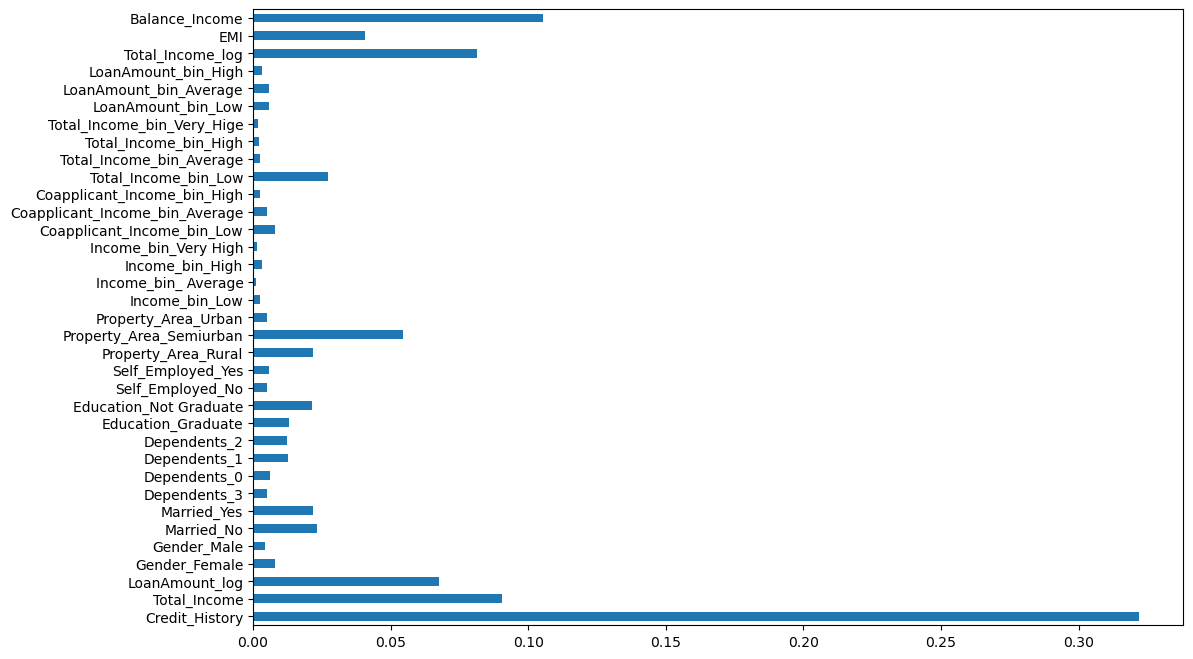

In [103]:
importance = pd.Series(model.feature_importances_,index = X.columns)
importance.plot(kind = 'barh',figsize = (12,8))

In [104]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [105]:
from xgboost import XGBClassifier

i=1
kf = StratifiedKFold(n_splits=5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of Kfold{}'. format(i,kf.n_splits))
xtr, xvl = X.loc[train_index], X.loc[test_index]
ytr, yvl = y[train_index],y[test_index]
model = XGBClassifier(n_estimators=50, max_depth = 4 )
model.fit(xtr,ytr)
pred_test = model.predict(xvl)
score = accuracy_score(yvl,pred_test)
print('accuracy_score', score)
i+=1
pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]


1 of Kfold5

1 of Kfold5

1 of Kfold5

1 of Kfold5

1 of Kfold5
accuracy_score 0.7622950819672131


In [106]:
submission['Loan_Status'] = pred_test

In [107]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [108]:
pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')